In [2]:
from agent import build_and_save_functions

build_and_save_functions()

In [3]:
from dotenv import load_dotenv,find_dotenv
import openai
import os
load_dotenv(find_dotenv(),override=True)
openai.api_key = os.environ['OPENAI_API_KEY']

In [4]:
from agent import build_graph

router_names_graph,router_names = build_graph()

In [9]:
# for node,attr in router_names_graph['derivatives'].nodes(data=True):
#     print(node,attr)

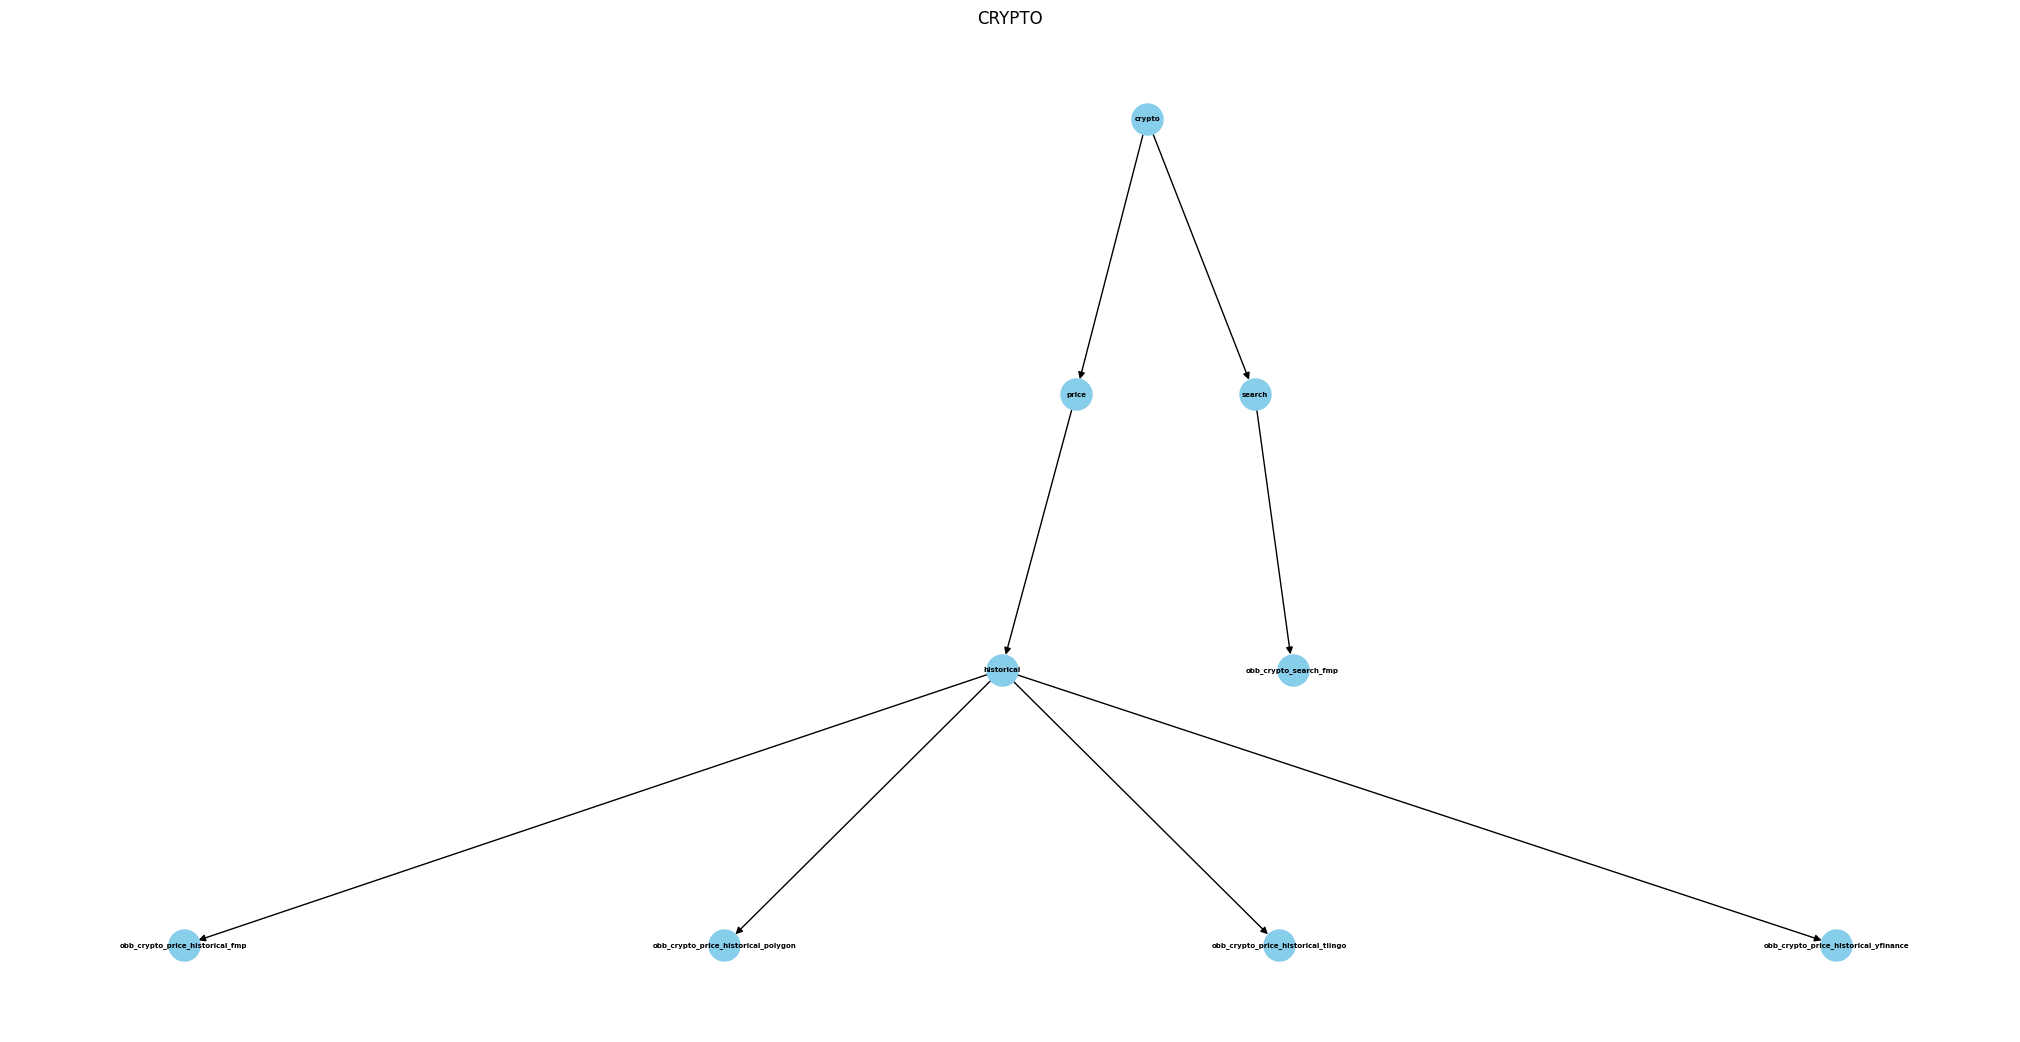

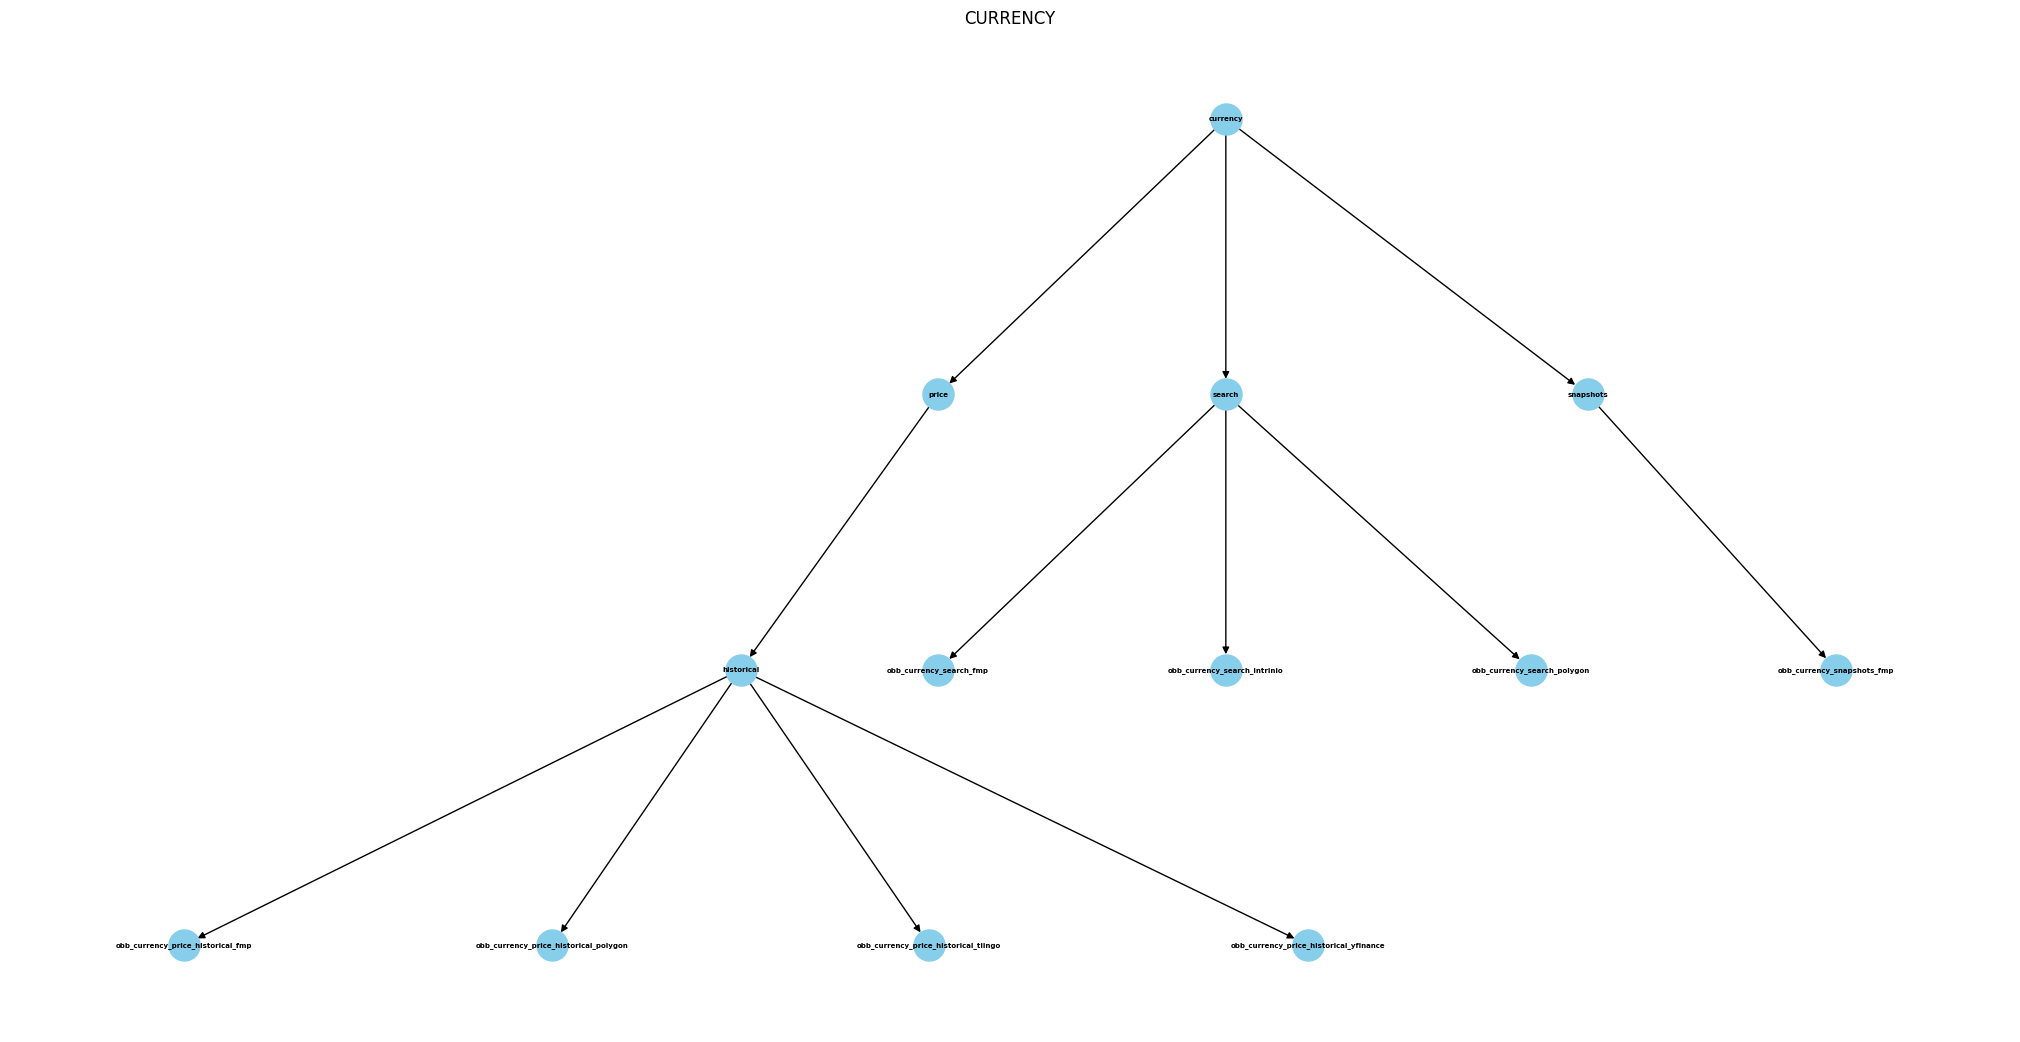

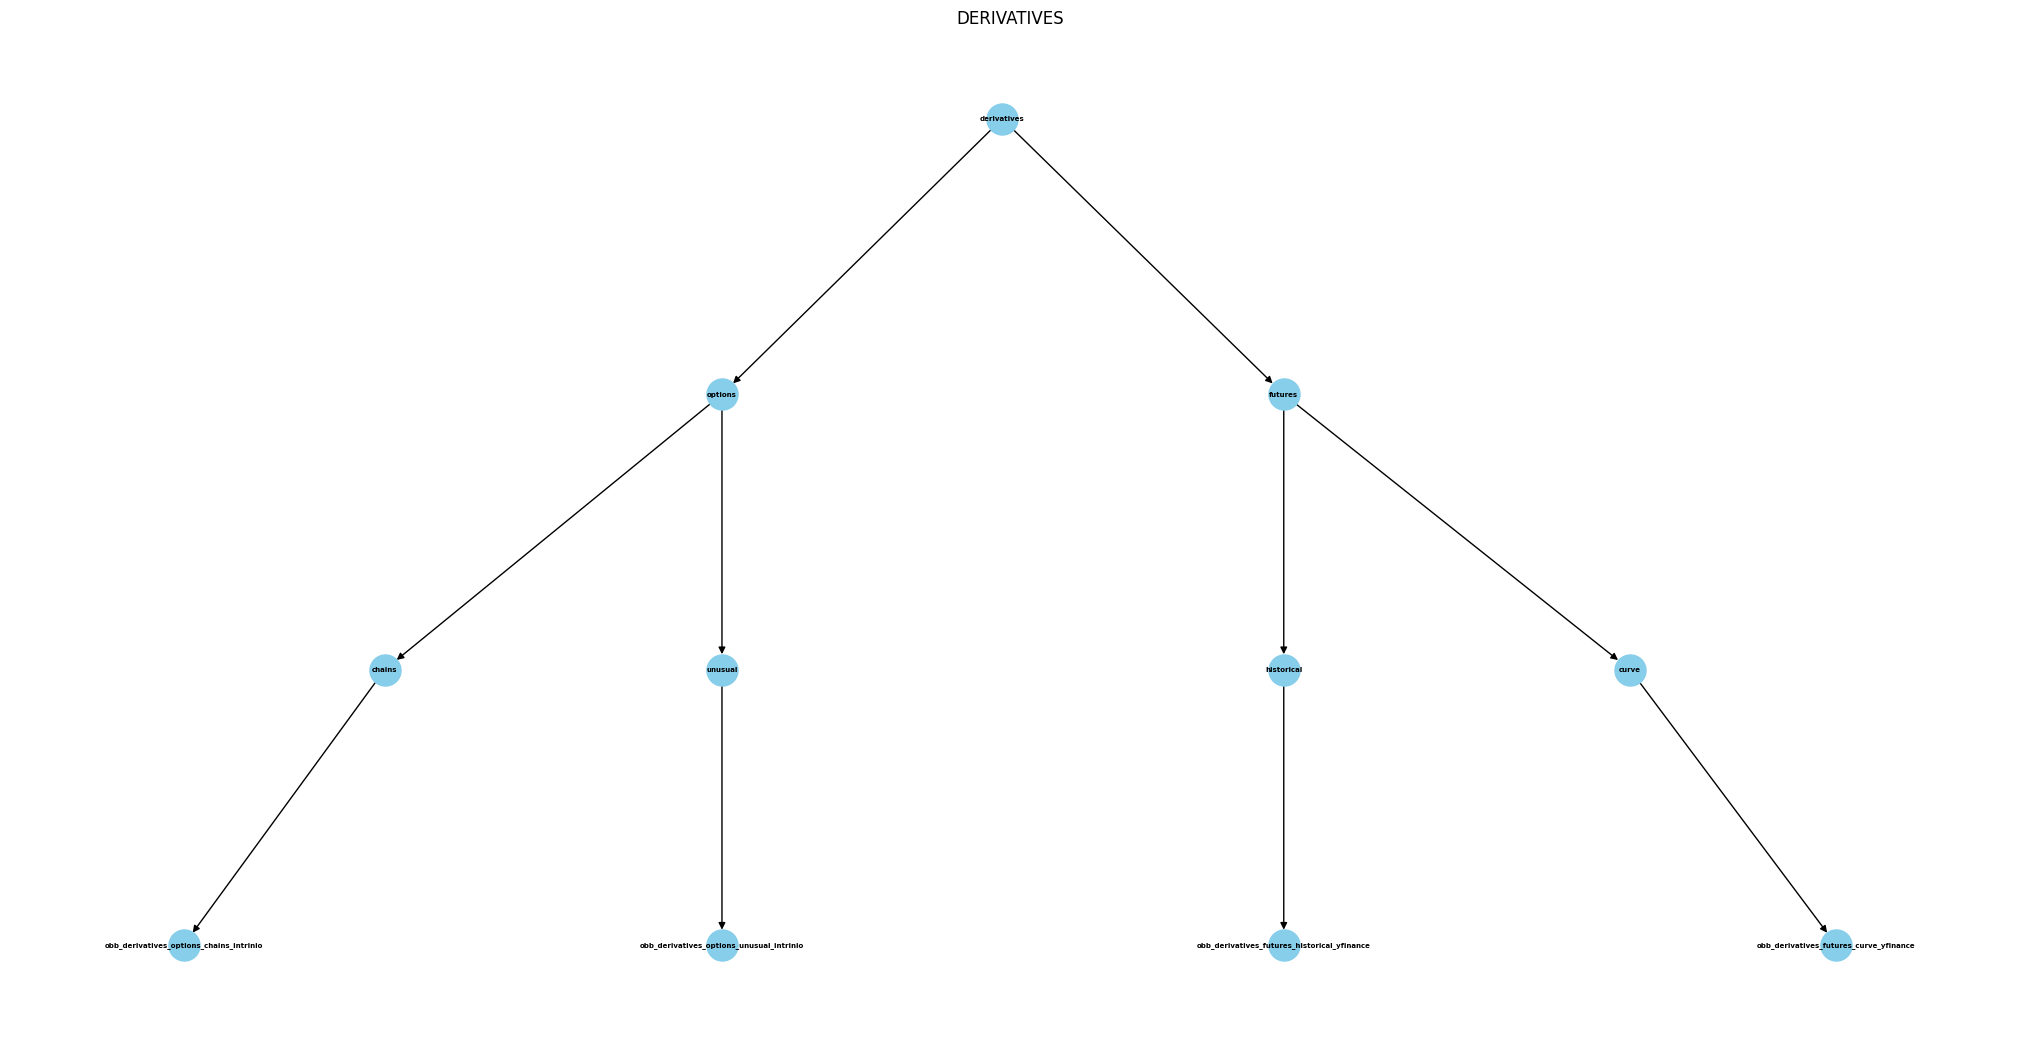

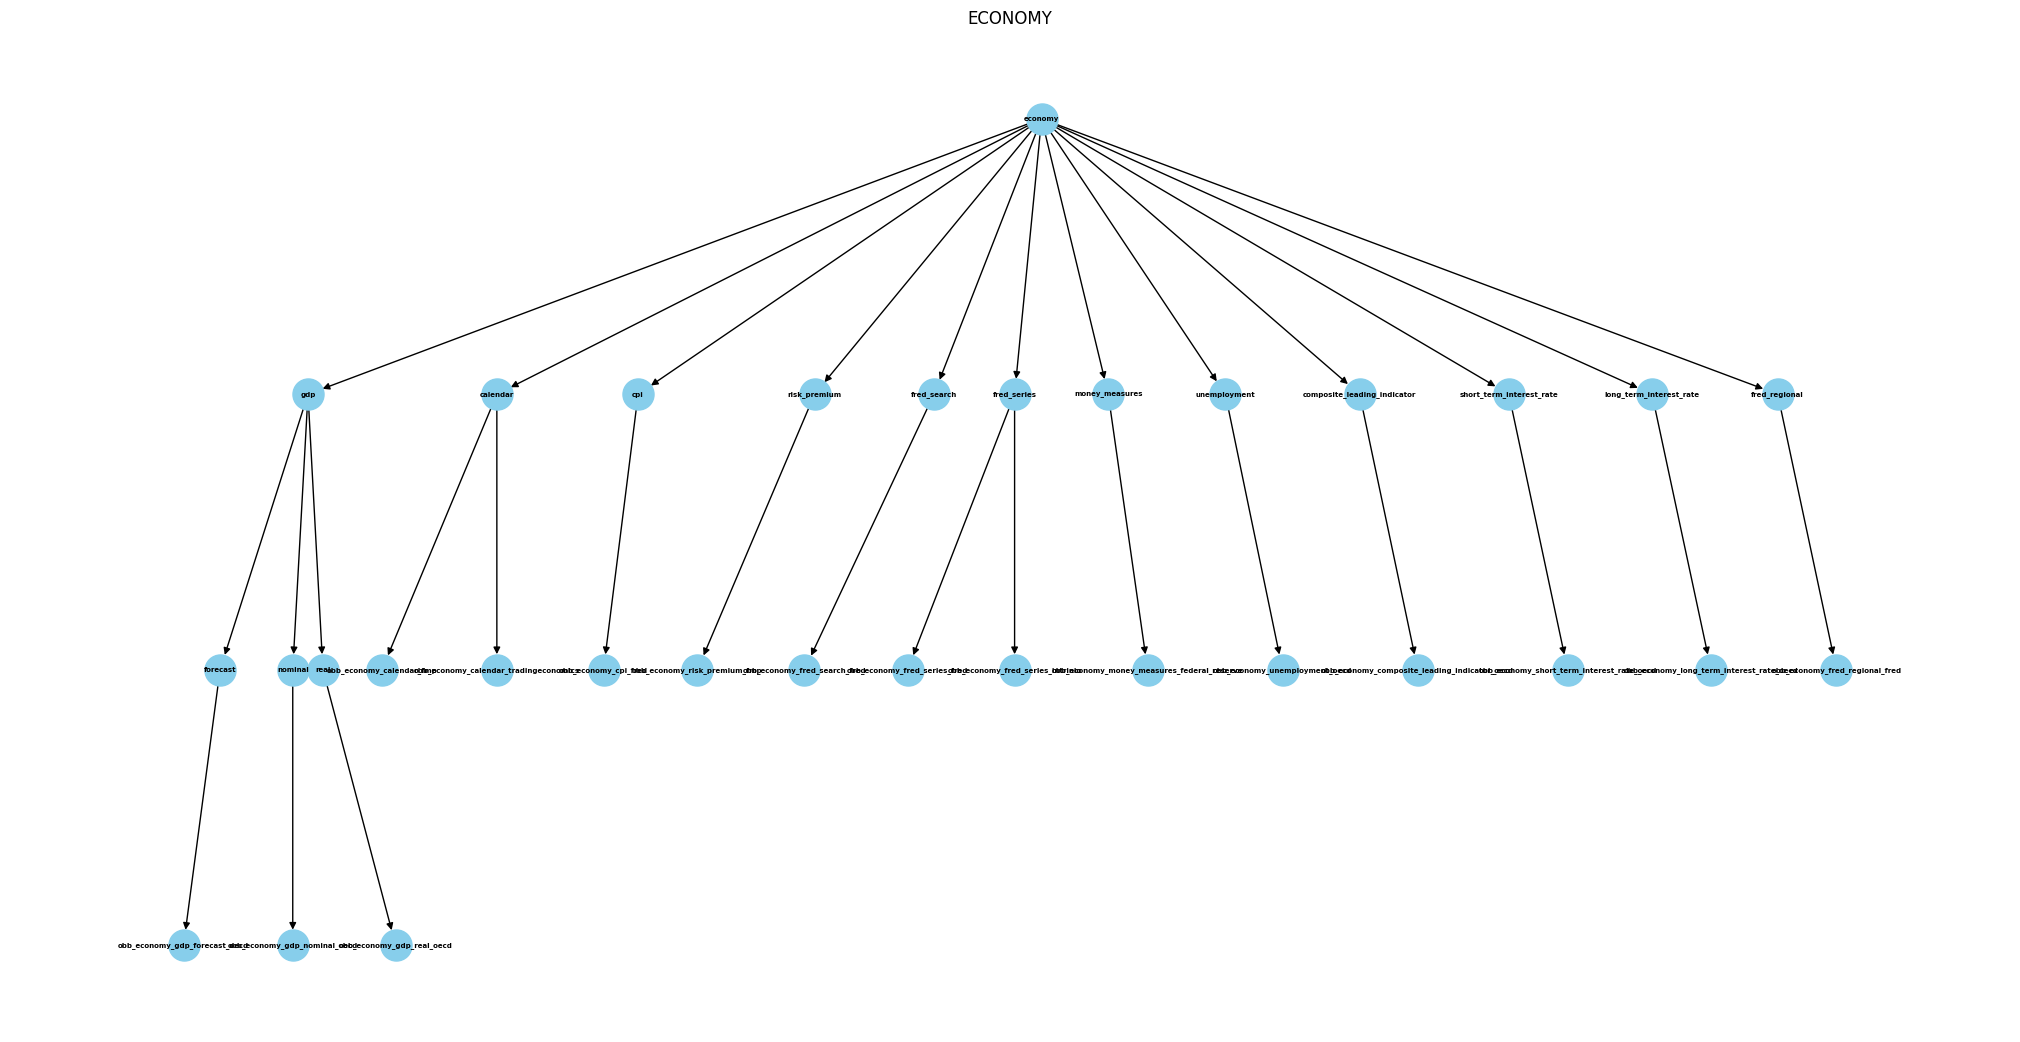

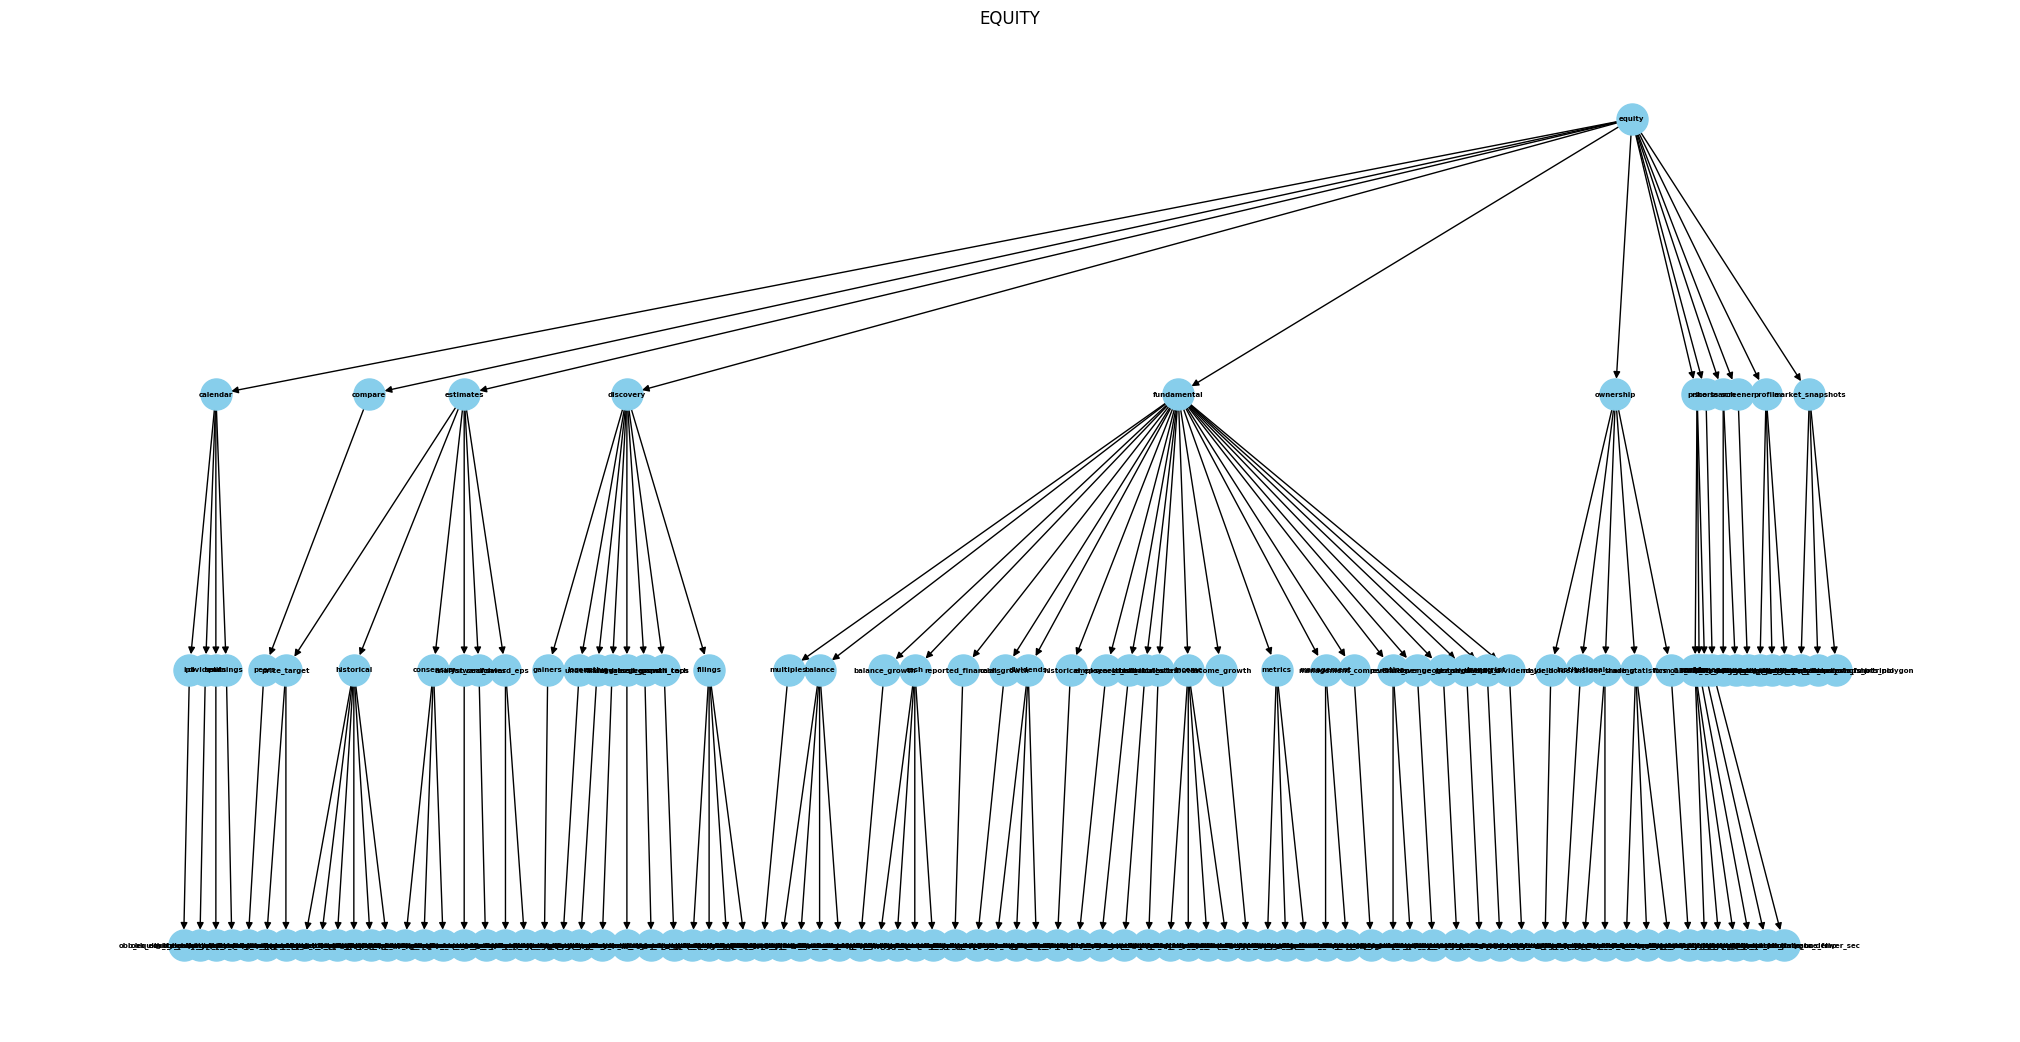

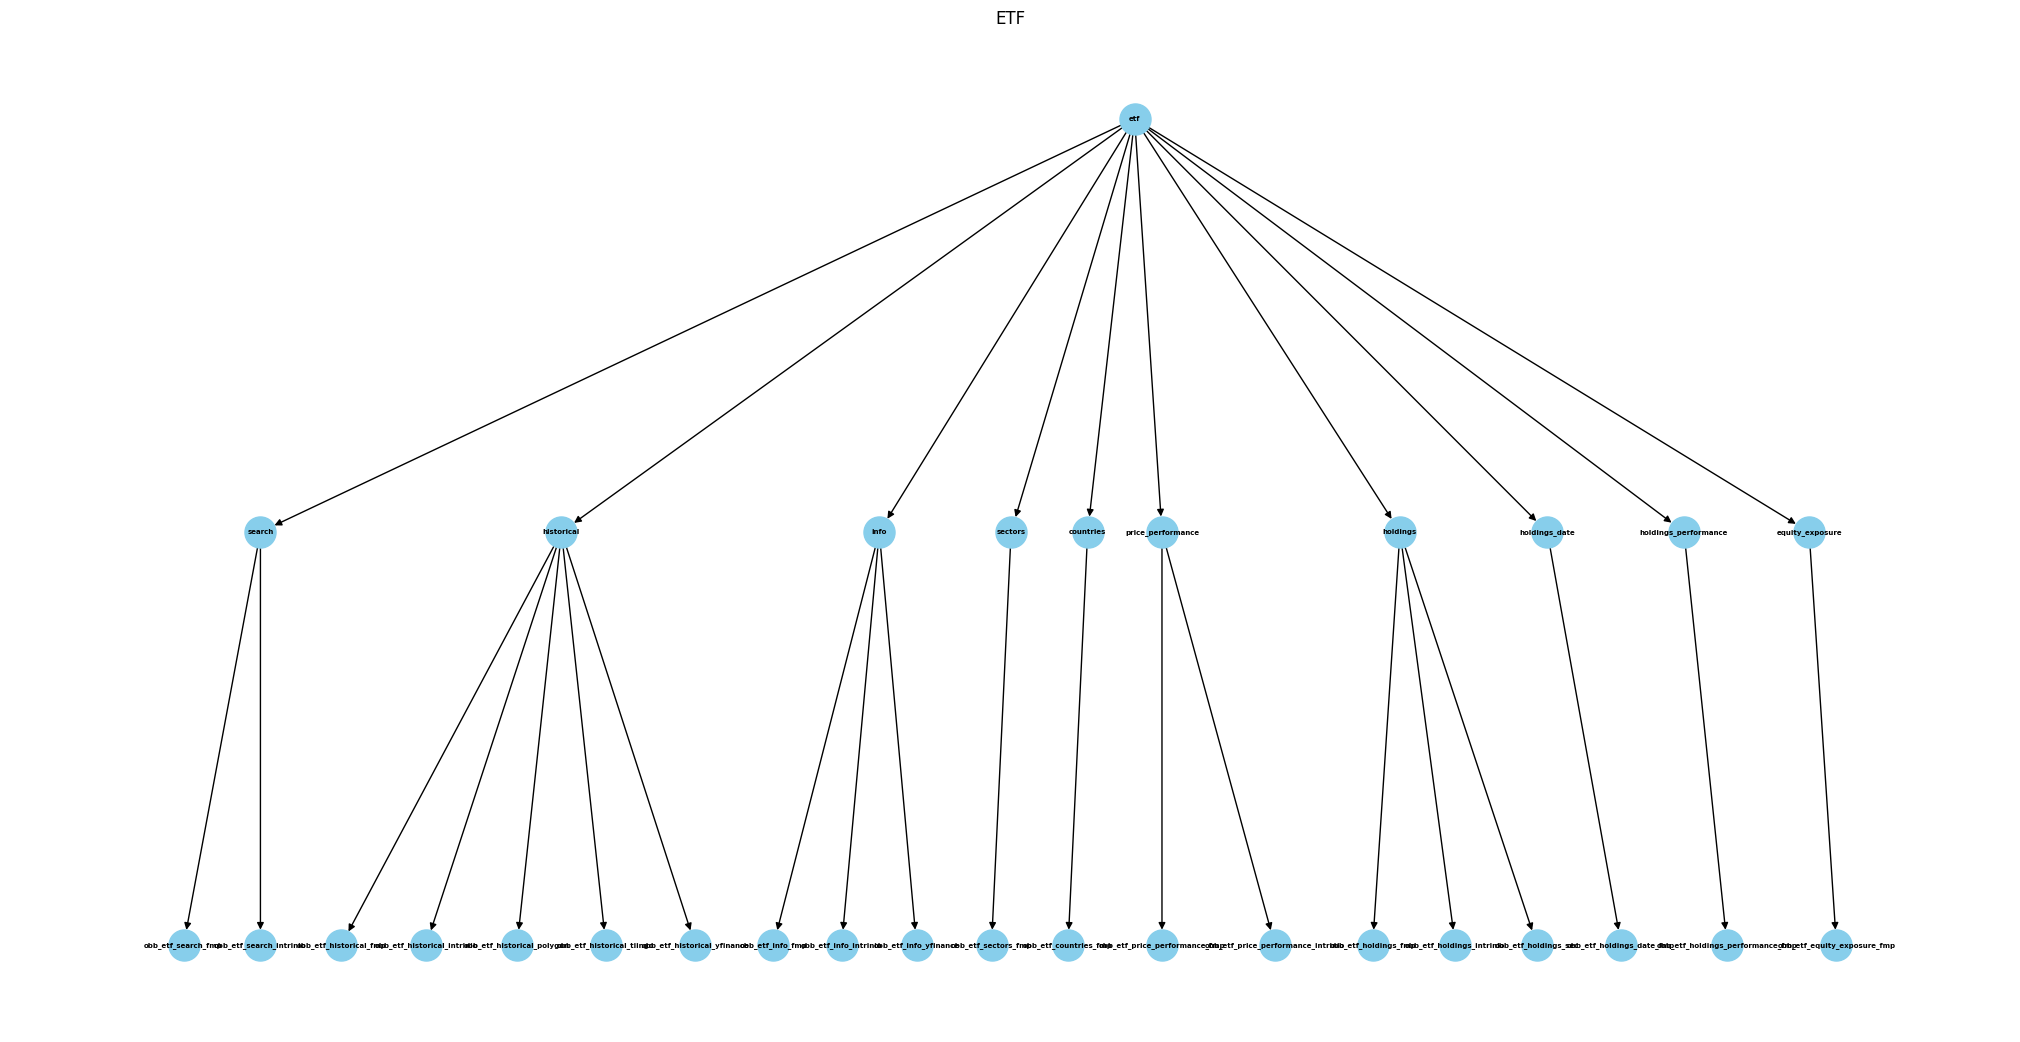

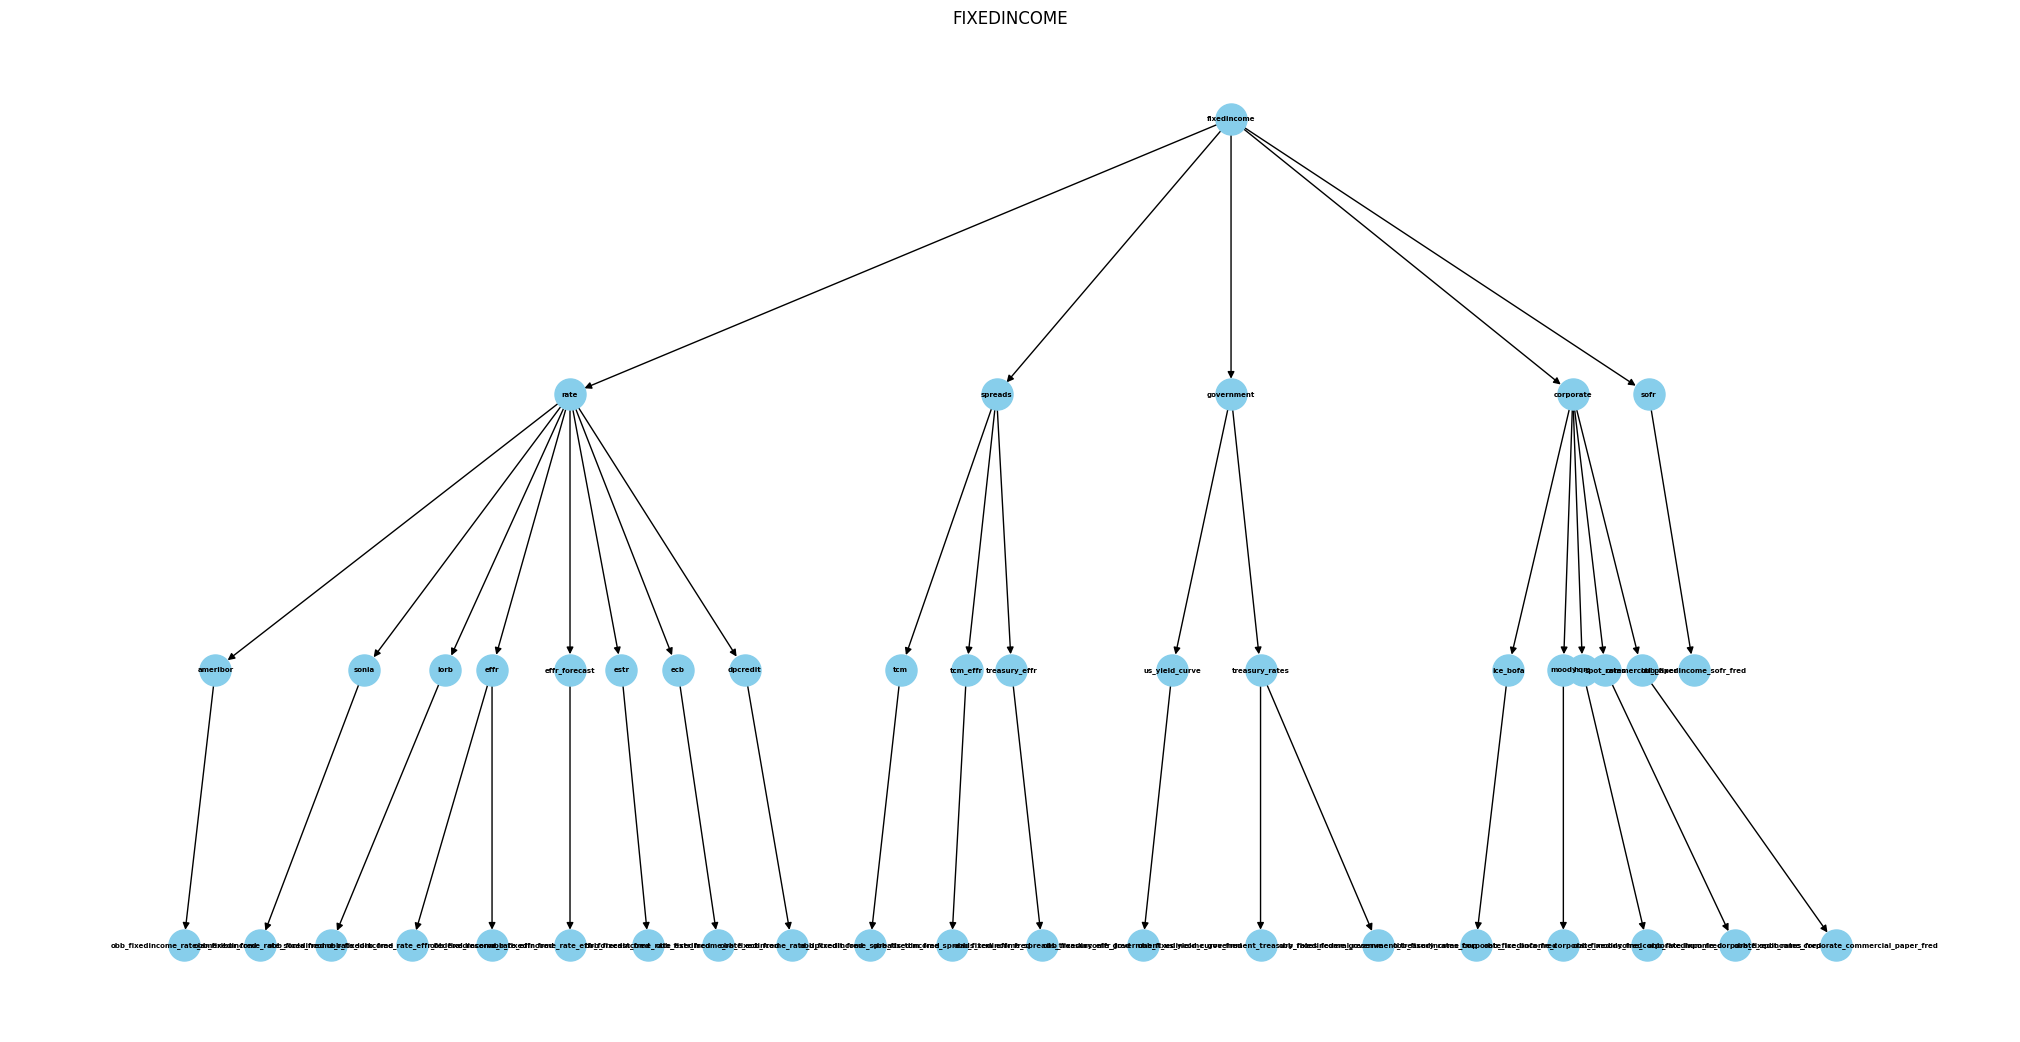

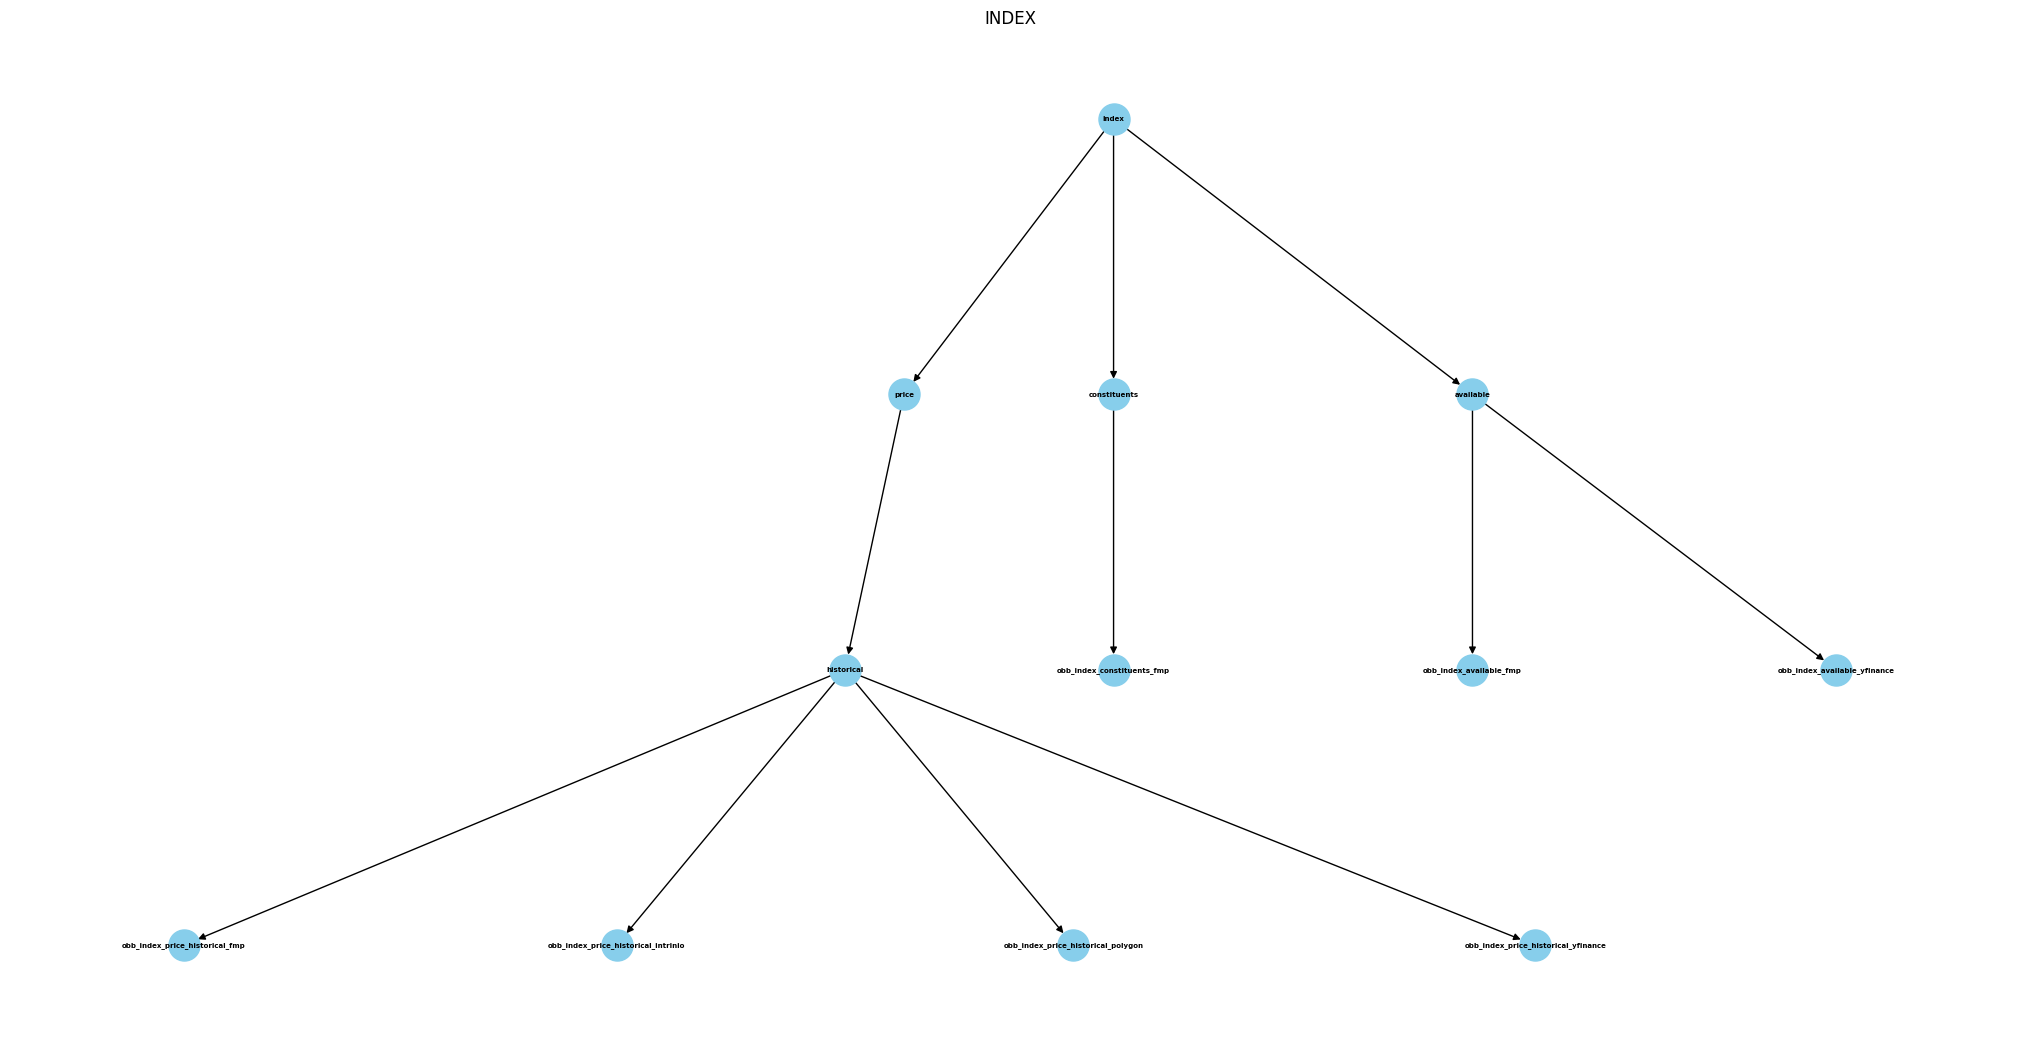

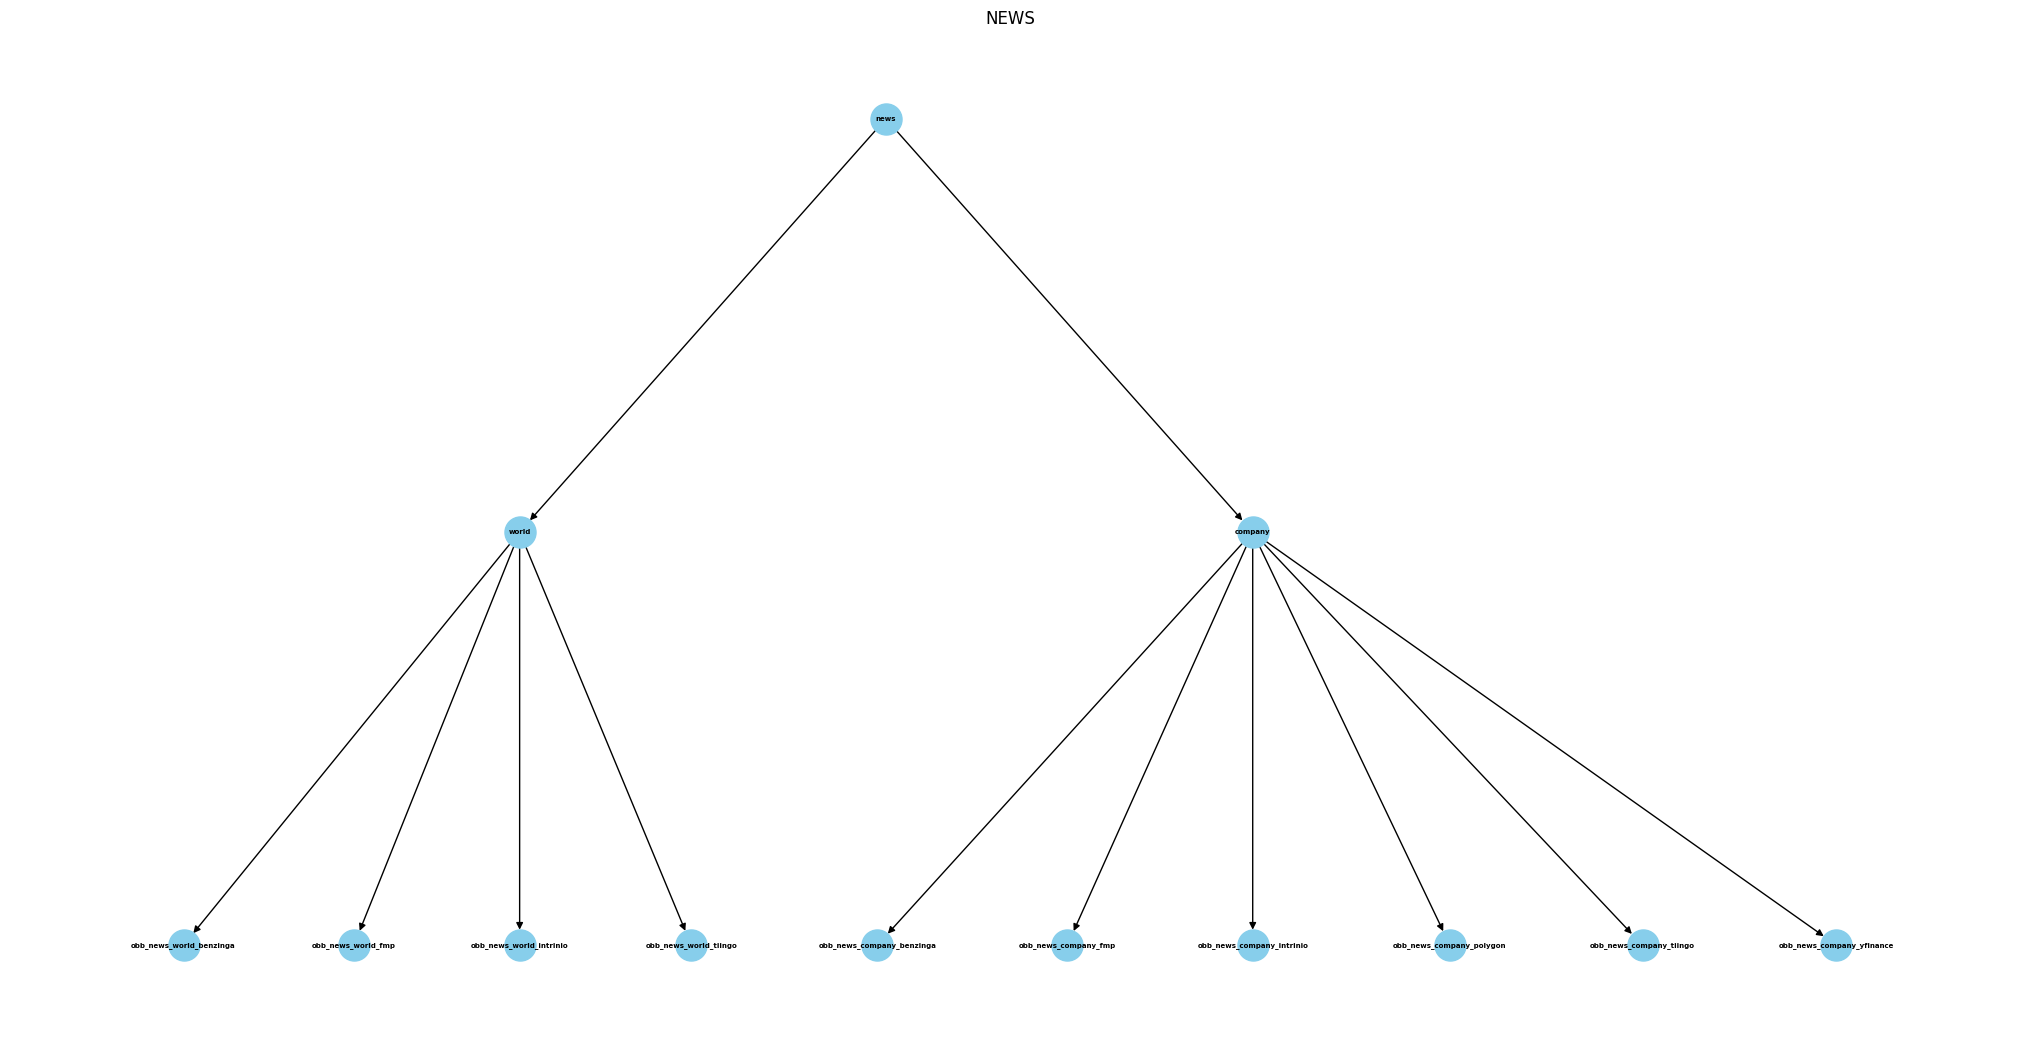

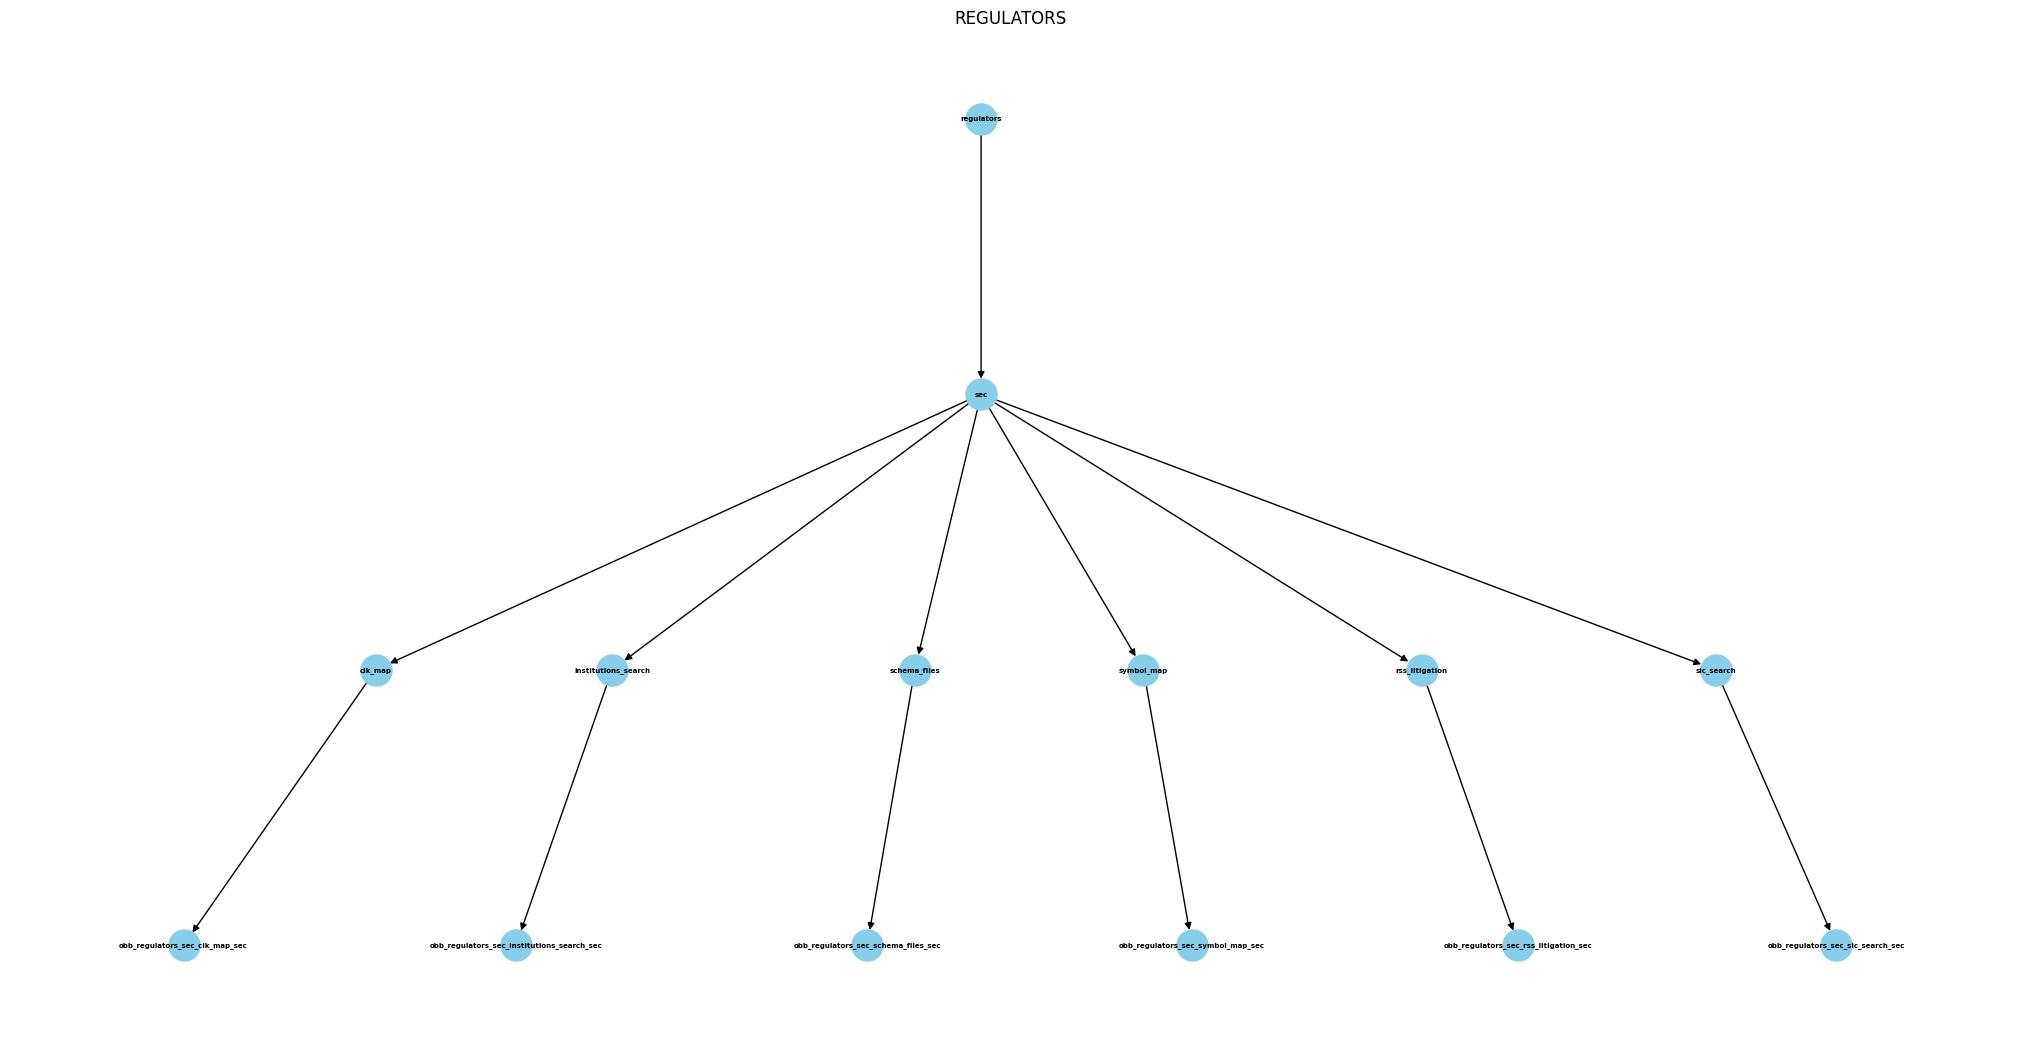

In [10]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
import networkx as nx

for router in router_names:
    graph = router_names_graph[router]
    pos = graphviz_layout(graph, prog="dot")
    plt.figure(figsize=(20, 10))
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=5, font_weight="bold", arrows=True)
    plt.title(f"{router.upper()}")
    plt.show()

In [11]:
from agent import build_docs_metadata

docs,metadata = build_docs_metadata(router_names_graph)

In [12]:
docs[10]

'Get the complete options chain for a ticker.'

In [13]:
metadata[10]

{'type': 'level_2',
 'description': 'Get the complete options chain for a ticker.',
 'trail': 'derivatives',
 'peanultimate_node': False,
 'node_name': 'options'}

In [14]:
from agent import build_database, load_database
import os
build_database(docs,metadata,os.environ['OPENAI_API_KEY'])

Collection(name=obb_docs)

In [2]:
import os
from agent import load_database
api_key = os.environ['OPENAI_API_KEY']
openbb_collection = load_database(api_key)

In [3]:

subsequent_level = openbb_collection.get(
                where={

                        "trail":{"$eq":"derivatives-->futures-->historical"},
                        # {"type": {"$eq": f"level_2"}},
                    
                },
            )
subsequent_level

{'ids': ['id162'],
 'embeddings': None,
 'metadatas': [{'function_call': '{\'name\': \'obb_derivatives_futures_historical_yfinance\', \'description\': \'Historical futures prices.\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for. Multiple items allowed for provider(s): yfinance.\', \'default\': \'\'}, \'start_date\': {\'type\': \'string\', \'description\': \'Start date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'end_date\': {\'type\': \'string\', \'description\': \'End date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'expiration\': {\'type\': \'string\', \'description\': \'Future expiry date with format YYYY-MM\', \'default\': None}, \'provider\': {\'description\': "The provider to use for the query, by default None. If None, the provider specified in defaults is selected or \'yfinance\' if there is no default.", \'default\': \'yfinance\', \'type\': \'string\', \'enum\'

In [4]:
openbb_collection.peek()['metadatas']

[{'description': 'Cryptocurrency market data.',
  'node_name': 'crypto',
  'type': 'level_1'},
 {'description': 'Get historical price data for cryptocurrency pair(s) within a provider.',
  'node_name': 'price',
  'peanultimate_node': False,
  'trail': 'crypto',
  'type': 'level_2'},
 {'description': 'Get the complete options chain for a ticker.',
  'node_name': 'options',
  'peanultimate_node': False,
  'trail': 'derivatives',
  'type': 'level_2'},
 {'description': 'ETF Sector weighting.',
  'node_name': 'sectors',
  'peanultimate_node': True,
  'trail': 'etf',
  'type': 'level_2'},
 {'description': 'ETF Country weighting.',
  'node_name': 'countries',
  'peanultimate_node': True,
  'trail': 'etf',
  'type': 'level_2'},
 {'description': 'Price performance as a return, over different periods.',
  'node_name': 'price_performance',
  'peanultimate_node': True,
  'trail': 'etf',
  'type': 'level_2'},
 {'description': 'Get the holdings for an individual ETF.',
  'node_name': 'holdings',
  '

## FUNCTION DISCOVERY PIPELINE

In [20]:
from agent import OpenBBAgentBM25, OpenBBAgentChroma
%load_ext autoreload
%autoreload 2

In [11]:
obb_bm25 = OpenBBAgentBM25(openbb_collection)

functions = obb_bm25("What is the quarter level historical price of Bitcoin from April 2022 to March 2024?")

First level answer: crypto
urrent Trail: ['crypto'] and level: 2
urrent Trail: ['crypto-->price'] and level: 3


In [12]:
functions

[[{'function_call': '{\'name\': \'obb_crypto_price_historical_fmp\', \'description\': \'Get historical price data for cryptocurrency pair(s) within a provider. Get it from provider fmp\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for. Can use CURR1-CURR2 or CURR1CURR2 format. Multiple items allowed for provider(s): fmp, polygon, tiingo, yfinance.\', \'default\': \'\'}, \'start_date\': {\'type\': \'string\', \'description\': \'Start date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'end_date\': {\'type\': \'string\', \'description\': \'End date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'provider\': {\'description\': "The provider to use for the query, by default None. If None, the provider specified in defaults is selected or \'fmp\' if there is no default.", \'default\': \'fmp\', \'type\': \'string\', \'enum\': [\'fmp\']}, \'interval\': {\'name\': \'interval\', \'descri

In [13]:
obb_chroma = OpenBBAgentChroma(openbb_collection)

functions = obb_chroma("What is the quarter level historical price of Bitcoin from April 2022 to March 2024?")

First level answer: crypto
Current Trail: ['crypto'] and level: 2
Current Trail: ['crypto-->price'] and level: 3


In [14]:
functions

[[{'function_call': '{\'name\': \'obb_crypto_price_historical_fmp\', \'description\': \'Get historical price data for cryptocurrency pair(s) within a provider. Get it from provider fmp\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for. Can use CURR1-CURR2 or CURR1CURR2 format. Multiple items allowed for provider(s): fmp, polygon, tiingo, yfinance.\', \'default\': \'\'}, \'start_date\': {\'type\': \'string\', \'description\': \'Start date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'end_date\': {\'type\': \'string\', \'description\': \'End date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'provider\': {\'description\': "The provider to use for the query, by default None. If None, the provider specified in defaults is selected or \'fmp\' if there is no default.", \'default\': \'fmp\', \'type\': \'string\', \'enum\': [\'fmp\']}, \'interval\': {\'name\': \'interval\', \'descri

In [15]:
functions = obb_chroma("What is the company related news of Amazon?")

First level answer: news
Current Trail: ['news'] and level: 2
Subsequent level 2 string to LLM: company: Company News. Get news for one or more companies.

world: World News. Global news data.


LLM Answer: Prediction(
    rationale='produce the output. We need to find the key related to company news for Amazon.',
    output='company'
)
Current Trail: ['news-->company'] and level: 3


In [16]:
functions

[{'ids': ['id324', 'id325', 'id326', 'id327', 'id328', 'id329'],
  'embeddings': None,
  'metadatas': [{'function_call': '{\'name\': \'obb_news_company_benzinga\', \'description\': \'Company News. Get news for one or more companies. Get it from provider benzinga\', \'parameters\': {\'type\': \'object\', \'properties\': {\'symbol\': {\'type\': \'string\', \'description\': \'Symbol to get data for. Multiple items allowed for provider(s): benzinga, fmp, intrinio, polygon, tiingo, yfinance.\', \'default\': None}, \'start_date\': {\'type\': \'string\', \'description\': \'Start date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'end_date\': {\'type\': \'string\', \'description\': \'End date of the data, in YYYY-MM-DD format.\', \'default\': None}, \'limit\': {\'type\': \'integer\', \'description\': \'The number of data entries to return.\', \'default\': 2500}, \'provider\': {\'description\': "The provider to use for the query, by default None. If None, the provider specified in 

In [16]:
from agent import run_function_calling

response = run_function_calling(functions,'yfinance',"What is the historical earnings per share of Amazon?")

In [17]:
response

AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{"symbol":"AMZN","provider":"yfinance","period":"annual","limit":5}', 'name': 'obb_equity_fundamental_income'}}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 182, 'total_tokens': 201}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-18e7f2ea-5727-4a75-958d-d72f5869673b-0')

In [23]:
from agent import run_function_calling

question = "What is the historical earnings per share data of Amazon?"

functions = obb_chroma(question)
print(f"Functions: {functions}")

function_response = run_function_calling(functions,'fmp',question)
print("Function Calling response: ",function_response)

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: market_snapshots: Get an updated equity market snapshot. This includes price data for thousands of stocks.

ownership: Get data about major holders for a given company over time.

fundamental: Get equity valuation multiples for a given company.

calendar: Get historical and upcoming initial public offerings (IPOs).

discovery: Get the top price gainers in the stock market.


LLM Answer: Prediction(
    rationale='produce the output. We are looking for historical earnings per share data, which falls under fundamental financial data.',
    output='fundamental'
)
Current Trail: ['equity-->fundamental'] and level: 3
Subsequent level 3 string to LLM: historical_eps: Get historical earnings per share data for a given company.

historical_splits: Get historical stock splits for a given company.

dividends: Get historical dividend data for a given company.

employee_count: Get historical employe

In [24]:
import ast

obb_func = function_response.additional_kwargs['function_call']
obb_func_name = obb_func['name']
obb_func_name = ".".join(obb_func_name.split("_",2)) + "("
args_dict = ast.literal_eval(obb_func['arguments'])
for arg,val in args_dict.items():
    obb_func_name+=f"{arg}={val},"
obb_func_name = obb_func_name[:-1] + ")"

In [25]:
final_func = "from openbb import obb\n" + obb_func_name
print(final_func)

from openbb import obb
obb.equity.fundamental_historical_eps(symbol=AMZN,provider=fmp)


In [5]:
from agent import run_function_calling, format_function
from agent import OpenBBAgentBM25, OpenBBAgentChroma
%load_ext autoreload
%autoreload 2
obb_chroma = OpenBBAgentChroma(openbb_collection)
def main(question:str,provider:str):
    functions = obb_chroma(question)
    print(f"Functions: {functions}")

    function_response = run_function_calling(functions,provider,question)
    print("Function Calling response: ",function_response)
    return format_function(function_response)

In [6]:
func = main("I want historical future 30 minutes level prices for ES and NQ ",provider='yfinance')
func

First level answer: derivatives
Current Trail: ['derivatives'] and level: 2
Subsequent level 2 string to LLM: futures: Historical futures prices.

options: Get the complete options chain for a ticker.


LLM Answer: Prediction(
    rationale='produce the output. We need to find historical future prices for ES and NQ for the next 30 minutes.',
    output='futures'
)
Current Trail: ['derivatives-->futures'] and level: 3
Subsequent level 3 string to LLM: historical: Historical futures prices.

curve: Futures Term Structure, current or historical.


LLM Answer: Prediction(
    rationale='produce the output. We need to find the key that is most relevant to the query, which is requesting historical future 30 minutes level prices for ES and NQ.',
    output='historical'
)
Current Trail: ['derivatives-->futures-->historical'] and level: 4
Functions: [{'ids': ['id162'], 'embeddings': None, 'metadatas': [{'function_call': '{\'name\': \'obb_derivatives_futures_historical_yfinance\', \'description\

/home/athekunal/Function Calling/openbb-env/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


Function Calling response:  content='' additional_kwargs={'function_call': {'arguments': '{"symbol":"ES NQ","provider":"yfinance","interval":"30m"}', 'name': 'obb_derivatives_futures_historical'}} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 293, 'total_tokens': 310}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-1a99f130-dfd1-4614-be84-b35161e1d5f2-0'


'from openbb import obb\nobb.derivatives.futures_historical(symbol=ES NQ,provider=yfinance,interval=30m)'

In [20]:
func = main("What is the historical earnings per share data of Amazon?",provider='fmp')
func

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: market_snapshots: Get an updated equity market snapshot. This includes price data for thousands of stocks.

ownership: Get data about major holders for a given company over time.

fundamental: Get equity valuation multiples for a given company.

calendar: Get historical and upcoming initial public offerings (IPOs).

discovery: Get the top price gainers in the stock market.


LLM Answer: Prediction(
    rationale='produce the output. We are looking for historical earnings per share data, which falls under fundamental financial data.',
    output='fundamental'
)
Current Trail: ['equity-->fundamental'] and level: 3
Subsequent level 3 string to LLM: historical_eps: Get historical earnings per share data for a given company.

historical_splits: Get historical stock splits for a given company.

dividends: Get historical dividend data for a given company.

employee_count: Get historical employe

'from openbb import obb\nobb.equity.fundamental_historical_eps(symbol=AMZN,provider=fmp)'

In [26]:
func = main("Give me the forecasted nominal gdp data for bulgaria",provider='oecd')
print(func)

First level answer: economy
Current Trail: ['economy'] and level: 2
Subsequent level 2 string to LLM: gdp: Get Forecasted GDP Data.

unemployment: Get global unemployment data.

calendar: Get the upcoming, or historical, economic calendar of global events.

risk_premium: Get Market Risk Premium by country.

money_measures: Get Money Measures (M1/M2 and components).The Federal Reserve publishes as part of the H.6 Release.


LLM Answer: Prediction(
    rationale='produce the output. We need to find the forecasted nominal GDP data for Bulgaria, so we should look for the key related to GDP data.',
    output='gdp'
)
Current Trail: ['economy-->gdp'] and level: 3
Subsequent level 3 string to LLM: forecast: Get Forecasted GDP Data.

nominal: Get Nominal GDP Data.

real: Get Real GDP Data.


LLM Answer: Prediction(
    rationale='produce the output. We need to find the forecasted nominal GDP data for Bulgaria.',
    output='forecast; nominal'
)
Current Trail: ['economy-->gdp-->nominal', 'econo

In [28]:
func = main("I want the FRED regional data for NYICLAIMS for the year 2021 and limit the results to 10",provider='fred')
print(func)

First level answer: economy; limit
Current Trail: ['economy', 'limit'] and level: 2
Subsequent level 2 string to LLM: fred_regional: Query the Geo Fred API for regional economic data by series group.The series group ID is found by using `fred_search` and the `series_id` parameter.

fred_series: Get data by series ID from FRED.

fred_search: Search for FRED series or economic releases by ID or string.This does not return the observation values, only the metadata.Use this function to find series IDs for `fred_series()`.

unemployment: Get global unemployment data.

gdp: Get Forecasted GDP Data.


LLM Answer: Prediction(
    rationale='produce the output. We need to query the FRED regional data for NYICLAIMS for the year 2021 and limit the results to 10. This involves searching for a specific series ID related to NYICLAIMS regional data for the year 2021.',
    output='fred_search; fred_series; fred_regional'
)
Current Trail: ['economy-->fred_search', 'economy-->fred_regional', 'economy--

In [29]:
func = main("I want to find the upcoming dividend payments",provider='fmp')
print(func)

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: calendar: Get historical and upcoming initial public offerings (IPOs).

ownership: Get data about major holders for a given company over time.

discovery: Get the top price gainers in the stock market.

screener: Screen for companies meeting various criteria.These criteria include market cap, price, beta, volume, and dividend yield.

market_snapshots: Get an updated equity market snapshot. This includes price data for thousands of stocks.


LLM Answer: Prediction(
    rationale='produce the output. We are looking for upcoming dividend payments, so the most relevant key is "screener" as it allows us to screen for companies meeting various criteria, including dividend yield.',
    output='screener'
)
Current Trail: ['equity-->screener'] and level: 3
Functions: [{'ids': ['id265'], 'embeddings': None, 'metadatas': [{'function_call': '{\'name\': \'obb_equity_screener_fmp\', \'description\': \

BadRequestError: Error code: 400 - {'error': {'message': "Invalid schema for function 'obb_equity_screener': 'float' is not valid under any of the given schemas.", 'type': 'invalid_request_error', 'param': 'functions[0].parameters', 'code': 'invalid_function_parameters'}}

In [7]:
func = main("I want the closest peer for Microsoft",provider='fmp')
print(func)

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: compare: Get the closest peers for a given company.Peers consist of companies trading on the same exchange, operating within the same sectorand with comparable market capitalizations.

calendar: Get historical and upcoming initial public offerings (IPOs).

estimates: Get analyst price targets by company.

market_snapshots: Get an updated equity market snapshot. This includes price data for thousands of stocks.

fundamental: Get equity valuation multiples for a given company.


LLM Answer: Prediction(
    rationale='produce the output. We are looking for the closest peers for a given company, which falls under the "compare" category.',
    output='compare'
)
Current Trail: ['equity-->compare'] and level: 3
Functions: [{'ids': ['id184'], 'embeddings': None, 'metadatas': [{'function_call': '{\'name\': \'obb_equity_compare_peers_fmp\', \'description\': \'Get the closest peers for a given com

In [9]:
func = main("I want undervalued growth stocks from yahoo finance sorted by ascending order",provider='fmp')
print(func)

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: discovery: Get the top price gainers in the stock market.

fundamental: Get equity valuation multiples for a given company.

estimates: Get analyst price targets by company.

screener: Screen for companies meeting various criteria.These criteria include market cap, price, beta, volume, and dividend yield.

calendar: Get historical and upcoming initial public offerings (IPOs).


LLM Answer: Prediction(
    rationale='produce the output. We need to find undervalued growth stocks, so we are looking for companies with potential for growth that are currently trading at a lower value than their potential. We also need to sort them by ascending order, meaning we want to see the stocks with the lowest valuation first.',
    output='screener'
)
Current Trail: ['equity-->screener'] and level: 3
Functions: [{'ids': ['id265'], 'embeddings': None, 'metadatas': [{'function_call': '{\'name\': \'obb_equ

BadRequestError: Error code: 400 - {'error': {'message': "Invalid schema for function 'obb_equity_screener': 'float' is not valid under any of the given schemas.", 'type': 'invalid_request_error', 'param': 'functions[0].parameters', 'code': 'invalid_function_parameters'}}

In [10]:
func = main("I want the equity valuation multiples for Apple (AAPL)",provider='fmp')
print(func)

First level answer: equity
Current Trail: ['equity'] and level: 2
Subsequent level 2 string to LLM: fundamental: Get equity valuation multiples for a given company.

market_snapshots: Get an updated equity market snapshot. This includes price data for thousands of stocks.

estimates: Get analyst price targets by company.

screener: Screen for companies meeting various criteria.These criteria include market cap, price, beta, volume, and dividend yield.

calendar: Get historical and upcoming initial public offerings (IPOs).


LLM Answer: Prediction(
    rationale='produce the output. We need to find the equity valuation multiples for a specific company, in this case, Apple (AAPL).',
    output='fundamental'
)
Current Trail: ['equity-->fundamental'] and level: 3
Subsequent level 3 string to LLM: multiples: Get equity valuation multiples for a given company.

metrics: Get fundamental metrics for a given company.

historical_eps: Get historical earnings per share data for a given company.

